# Exercise 1

For the evaluation of this unit, the student is asked to solve the following problem using the above Python Notebooks.

Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution.

In [17]:
#### Import necessary packages ####
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Definition of the distributions

##### Gaussian / normal distribution

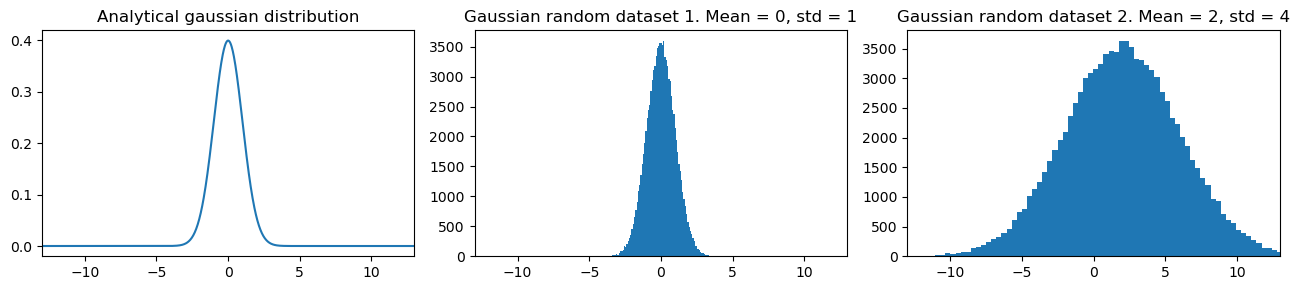

In [10]:
N_samples = int(1e5)
xlim = [-13,13]

# Analytical definition of the distribution
meanA = 0; stdA = 1

def gauss(x, mean, std):
    return (1/np.sqrt(2*np.pi*(std**2)))*np.exp(-(x-mean)**2/(2*std**2))

x = np.linspace(-13,13,1000); y = gauss(x, meanA, stdA)

# Random generation of samples following a gaussian distribution

mean1 = 0; std1 = 1
gauss_random1 = np.random.normal(loc=mean1, scale=std1, size=N_samples)

mean2 = 2; std2 = 4
gauss_random2 = np.random.normal(loc=mean2, scale=std2, size=N_samples)

# Plotting
fig1, axes_gauss = plt.subplots(nrows= 1, ncols= 3, figsize=(13, 3))
axes_gauss[0].plot(x,y); axes_gauss[1].hist(gauss_random1, 100); axes_gauss[2].hist(gauss_random2, 100);
axes_gauss[0].set_title('Analytical gaussian distribution'); 
axes_gauss[1].set_title(f"Gaussian random dataset 1. Mean = {mean1}, std = {std1}"); 
axes_gauss[2].set_title(f"Gaussian random dataset 2. Mean = {mean2}, std = {std2}")
for ax in axes_gauss:
    ax.set_xlim(xlim)
plt.tight_layout()


##### Uniformly random distribution

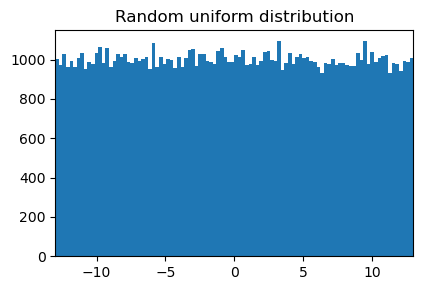

In [ ]:
# Random generation of samples inside xlim interval
uniform_random = (xlim[1] - xlim[0]) * (-0.5 + np.random.rand(N_samples))

# Plotting
fig2, axes_un = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_un.hist(uniform_random, 100);
axes_un.set_title('Random uniform distribution'); 
axes_un.set_xlim(xlim);
plt.tight_layout()

##### Beta random distribution

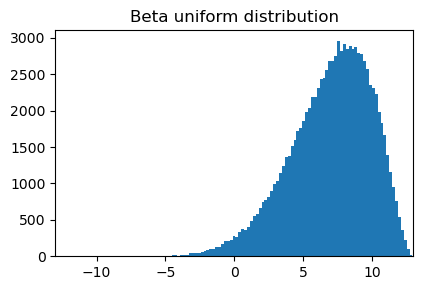

In [12]:
# Random generation of samples following beta distribution
alpha = 10; beta = 3
beta_random = (xlim[1] - xlim[0]) * (-0.5 +  np.random.beta(alpha, beta, N_samples))

# Plotting
fig3, axes_bet = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_bet.hist(beta_random, 100);
axes_bet.set_title('Beta uniform distribution'); 
axes_bet.set_xlim(xlim)
plt.tight_layout()

## Problem 1
Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

#### Preliminary comments


For solving this problem, we will compare the confidence interval given by the Hoeffding's inequality:
$$
P(|\bar{X} - E[\bar{X}]| \ge \epsilon) \le 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^{n} (a_i-b_i)^2}} = 2e^{-\frac{2n\epsilon^2}{(a-b)^2}}
$$

And the Chebyshev inequality, for a random variable which is the mean of our data samples:
$$
P(|\bar{X} - E[\bar{X}]| \ge \epsilon) \le \frac{Var(\bar{X})}{\epsilon^2} = \frac{Var(X)}{n \epsilon^2}
$$
where $Var(X)$ is the empirical variance obtained from our data samples.

From these two inequalities, we can set the error probability (this is, the probability of being "outside" the $\epsilon$ range) to a specific value and compute the value of $\epsilon$ (the confidence interval) for that probability. To do this, we can solve for $\epsilon$ in both equations, and this will wive us an analytical expression for the error bar or confidence interval for a specific confidence probability.

For the Hoeffding's inequality, we get:
$$
\epsilon_H = (a-b)*\sqrt{\frac{log(\frac{P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}{2})}{-2 n}}
$$

And for Chebyshev inequality we get a simpler expression which is:
$$
\epsilon_C = \sqrt{\frac{Var(X)}{n \cdot P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}}
$$
\
We will now define these two functions in the code

In [13]:
def eps_H (P,a,b,n):
    return np.abs(a-b) * np.sqrt((np.log(P/2)) / (-2*n))

def eps_C (P, Var, n):
    return np.sqrt(Var / (n*P))

#### Resolution

Now we can proceeed to computing the confidence intervals given by Chebyshev inequality and Hoeffding's inequality for all the distributions that we have sampled earlier.

For each distribution, we will use $(a,b)$ as the maximum and minimum values obtained in our data samples. Also, we will compute the empirical variance for each of the datasets.

In [14]:
# First we define the probabilities that we will use for obtaining the confidence intervals
Probs = np.linspace(1,100,990)/100  # Probability for being outside epsilon
Probs_inside = 1 - Probs

### Gaussian distribution ##############################

# Parameters
ag1 = min(gauss_random1); bg1 = max(gauss_random1)
ag2 = min(gauss_random2); bg2 = max(gauss_random2)

varg1 = np.var(gauss_random1, ddof = 1)
varg2 = np.var(gauss_random2, ddof = 1)

# Epsilon Hoeffding
eps_H_gauss1 = eps_H(Probs, ag1, bg1, N_samples)
eps_H_gauss2 = eps_H(Probs, ag2, bg2, N_samples)

# Epsilon Chebyshev
eps_C_gauss1 = eps_C(Probs, varg1, N_samples)
eps_C_gauss2 = eps_C(Probs, varg2, N_samples)

### Uniform distribution ##############################

# Parameters
au = min(uniform_random); bu = max(uniform_random)
varu = np.var(uniform_random, ddof = 1)

# Epsilon Hoeffding
eps_H_uniform = eps_H(Probs, au, bu, N_samples)

# Epsilon Chebyshev
eps_C_uniform = eps_C(Probs, varu, N_samples)

### Beta distribution ##############################

# Parameters
ab = min(beta_random); bb = max(beta_random)
varb = np.var(beta_random, ddof = 1)

# Epsilon Hoeffding
eps_H_beta = eps_H(Probs, ab, bb, N_samples)

# Epsilon Chebyshev
eps_C_beta = eps_C(Probs, varb, N_samples)


#### Plotting

We can now plot our results for the confidence intervals versus the probability $P(|\bar{X} - E[\bar{X}]| \ge \epsilon)$

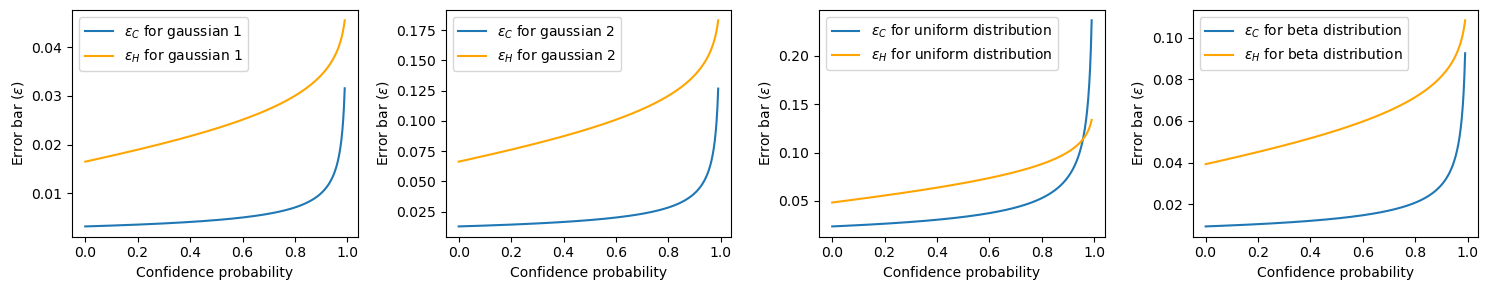

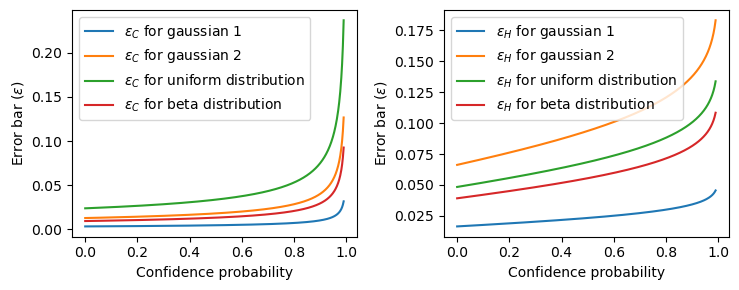

In [65]:
figeps, axeps = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

# Gaussian 1
axeps[0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axeps[0].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1', color = 'orange')
axeps[0].legend();

axeps[0].set_xlabel('Confidence probability'); axeps[0].set_ylabel(r'Error bar ($\epsilon$)')

# Gaussian 2
axeps[1].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axeps[1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2', color = 'orange')
axeps[1].legend();

axeps[1].set_xlabel('Confidence probability'); axeps[1].set_ylabel(r'Error bar ($\epsilon$)')

# Uniform distribution
axeps[2].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axeps[2].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution', color = 'orange')
axeps[2].legend();

axeps[2].set_xlabel('Confidence probability'); axeps[2].set_ylabel(r'Error bar ($\epsilon$)')

# Beta distribution
axeps[3].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')
axeps[3].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution', color = 'orange')
axeps[3].legend();

axeps[3].set_xlabel('Confidence probability'); axeps[3].set_ylabel(r'Error bar ($\epsilon$)')

figeps.tight_layout()

# Epsilon_C and Epsilon_H
figeps2, axeps2 = plt.subplots(nrows=1, ncols = 2, figsize = (7.5,3))

axeps2[0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axeps2[0].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axeps2[0].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axeps2[0].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')

axeps2[0].set_xlabel('Confidence probability'); axeps2[0].set_ylabel(r'Error bar ($\epsilon$)')

axeps2[1].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1')
axeps2[1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2')
axeps2[1].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution')
axeps2[1].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution')

axeps2[1].set_xlabel('Confidence probability'); axeps2[1].set_ylabel(r'Error bar ($\epsilon$)')


axeps2[0].legend(); axeps2[1].legend()

figeps2.tight_layout()

#### Conclusions

We can see in these graphs how the Hoeffding's inequality gives wider error bars than Chebyshev's for all cases, except for the uniform distribution for a confidence higher than 95% probability of being inside the error bar. In this case, the Chebyshev error bar becomes larger.

Furthermore, the Gaussian distribution is the one with smaller error bars, and the Gaussian with larger standard deviation has larger error bars. Also, the beta distribution has lower error bars than the uniform distribution, as we could expect.

## Problem 2
When possible, compare your results to theoretical values.

#### Preliminary comments

The theoretical values for this confidence intervals can be found by different means:

- For the Hoeffding case, we just need to compute $\epsilon_H$ using the theoretical bounds for the distribution, which we know for beta and uniform distributions. In the gaussian case, the bounds are $(-\infty, +\infty)$, so the theoretical $\epsilon_H$ would be infinite for any confidence probability.

- For the Chebyshev case, the theoretical value comes from the theoretical knowlegde of the variance.

- Furthermore, we can also compare our results with the error bar given by the CLT which assumes that the distribution of our empirical mean follows a gaussian. 

This last CLT is the most interesting approach, and we can do it by following a straightforward reasoning:

First, the CLT states that as N tends to infinity, the distribution of the empirical mean computed from a random sample of a population that follows (theoretically) a distibution with mean $\mu$ and standard deviation $\sigma$, is given by
$$
Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$
where $Z$ is the standard normal distribution for $n \to \infty$. We can thus solve for $\bar{X} - \mu$ and rename our distibution as
$$
Z' = \bar{X} - \mu = {\frac{\sigma}{\sqrt{n}}}Z
$$
And now, the probability that the empirical mean that we obtain from our random sample outside an error bar $\epsilon$ is very easy to compute (this is the exact same probability that Hoeffding and Chebichev inequalities bound):
$$
P(|\bar{X} - \mu| \ge \epsilon) = P(-\epsilon \ge Z' \ge \epsilon) = P(-\epsilon \ge \frac{\sigma}{\sqrt{n}}Z \ge \epsilon) = P(-\epsilon\frac{\sqrt{n}}{\sigma} \ge Z \ge \epsilon\frac{\sqrt{n}}{\sigma}) = 2 \cdot CDF(-\frac{\epsilon}{\sigma}\sqrt{n})
$$
since $Z$ is just the standard normal distribution and we can very easily evaluate this probability using the $CDF$ (Cumulative distribution function). Now, to obtain the inverse of this (get the error par from a spectific probability of being outside this error interval), we can use the Percent Point Function ($PPF$, inverse of the $CDF$) such that
$$
-\epsilon\frac{\sqrt{n}}{\sigma} = PPF(\frac{P(|\bar{X} - \mu| \ge \epsilon)}{2})
$$
$$
\epsilon = -\frac{\sigma}{\sqrt{n}} PPF_{python}(\frac{P(|\bar{X} - \mu| \ge \epsilon)}{2})
$$


Now we have all the necessary tools for computing this theoretical error bars and comparing to our previous results.

#### Solution

Function definition

In [51]:
def eps_CLT(P, mu, sigma, N):
    return -(sigma/np.sqrt(N)) * stats.norm.ppf(P/2)

Resolution

In [52]:
### Gaussian distributions ##############################

## Parameters
bounds_gaussian = [] # infinite bounds
var_gaussian1 = std1**2
var_gaussian2 = std2**2
mean_gaussian1 = 0
mean_gaussian2 = 2

# Hoeffding
#There is no theoretical bound for the gaussian

# Chebyshev
th_eps_C_gauss_1 = eps_C(Probs, var_gaussian1, N_samples)
th_eps_C_gauss_2 = eps_C(Probs, var_gaussian2, N_samples)

# CLT
th_eps_CLT_gauss1 = eps_CLT(Probs, mean_gaussian1, np.sqrt(var_gaussian1), N_samples)
th_eps_CLT_gauss2 = eps_CLT(Probs, mean_gaussian2, np.sqrt(var_gaussian2), N_samples)

### Uniform distribution ##############################

## Parameters
bounds_uniform = xlim
var_uniform = ((xlim[1]-xlim[0])**2) * (1/12)
mean_uniform = (xlim[1] + xlim[0])/2

# Hoeffding
th_eps_H_uniform = eps_H(Probs, xlim[0], xlim[1], N_samples)

# Chebyshev
th_eps_C_uniform = eps_C(Probs, var_uniform, N_samples)

# CLT
th_eps_CLT_uniform = eps_CLT(Probs, mean_uniform, np.sqrt(var_uniform), N_samples)

### Beta distribution ##############################

## Parameters
bounds_beta = xlim
var_beta = ((xlim[1]-xlim[0])**2) * ((alpha*beta) / (((alpha + beta)**2)*(alpha + beta + 1)))
mean_beta = (xlim[1]-xlim[0]) * ((alpha / (alpha + beta)) - 1/2)

# Hoeffding
th_eps_H_beta = eps_H(Probs, xlim[0], xlim[1], N_samples)

# Chebyshev
th_eps_C_beta = eps_C(Probs, var_beta, N_samples)

# CLT
th_eps_CLT_beta = eps_CLT(Probs, mean_beta, np.sqrt(var_beta), N_samples)

#### Plotting

We can now plot the comparision between the theoretical error bars and the results obtained in Problem 1

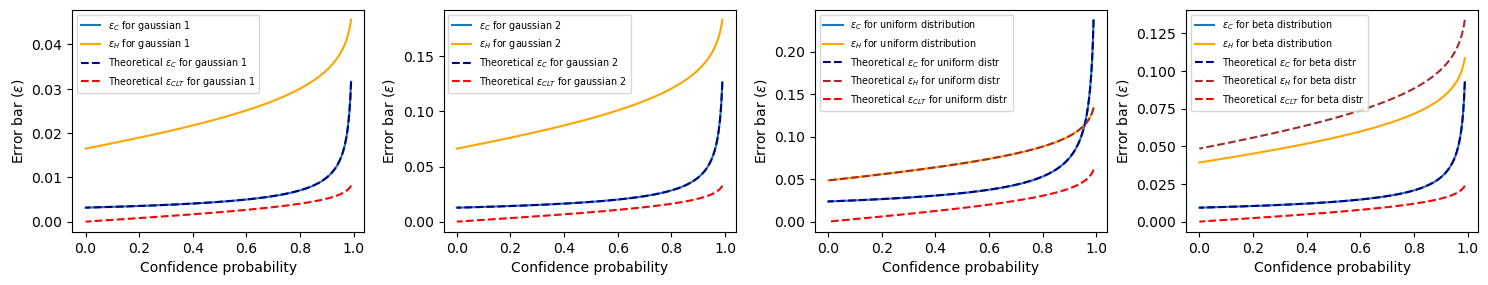

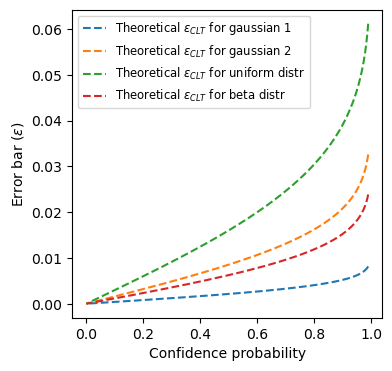

In [58]:
figepsTh, axepsTh = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

# Gaussian 1
axepsTh[0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axepsTh[0].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1', color = 'orange')

axepsTh[0].plot(Probs_inside, th_eps_C_gauss_1, label = r'Theoretical $\epsilon_C$ for gaussian 1', color = 'darkblue', linestyle = '--')
axepsTh[0].plot(Probs_inside, th_eps_CLT_gauss1, label = r'Theoretical $\epsilon_{CLT}$ for gaussian 1', color = 'red', linestyle = '--')

axepsTh[0].legend(fontsize='x-small');

axepsTh[0].set_xlabel('Confidence probability'); axepsTh[0].set_ylabel(r'Error bar ($\epsilon$)')

# Gaussian 2
axepsTh[1].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axepsTh[1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2', color = 'orange')

axepsTh[1].plot(Probs_inside, th_eps_C_gauss_2, label = r'Theoretical $\epsilon_C$ for gaussian 2', color = 'darkblue', linestyle = '--')
axepsTh[1].plot(Probs_inside, th_eps_CLT_gauss2, label = r'Theoretical $\epsilon_{CLT}$ for gaussian 2', color = 'red', linestyle = '--')

axepsTh[1].legend(fontsize='x-small');

axepsTh[1].set_xlabel('Confidence probability'); axepsTh[1].set_ylabel(r'Error bar ($\epsilon$)')

# Uniform distribution
axepsTh[2].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axepsTh[2].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution', color = 'orange')

axepsTh[2].plot(Probs_inside, th_eps_C_uniform, label = r'Theoretical $\epsilon_C$ for uniform distr', color = 'darkblue', linestyle = '--')
axepsTh[2].plot(Probs_inside, th_eps_H_uniform, label = r'Theoretical $\epsilon_H$ for uniform distr', color = 'brown', linestyle = '--')
axepsTh[2].plot(Probs_inside, th_eps_CLT_uniform, label = r'Theoretical $\epsilon_{CLT}$ for uniform distr', color = 'red', linestyle = '--')

axepsTh[2].legend(fontsize='x-small');

axepsTh[2].set_xlabel('Confidence probability'); axepsTh[2].set_ylabel(r'Error bar ($\epsilon$)')

# Beta distribution
axepsTh[3].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')
axepsTh[3].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution', color = 'orange')

axepsTh[3].plot(Probs_inside, th_eps_C_beta, label = r'Theoretical $\epsilon_C$ for beta distr', color = 'darkblue', linestyle = '--')
axepsTh[3].plot(Probs_inside, th_eps_H_beta, label = r'Theoretical $\epsilon_H$ for beta distr', color = 'brown', linestyle = '--')
axepsTh[3].plot(Probs_inside, th_eps_CLT_beta, label = r'Theoretical $\epsilon_{CLT}$ for beta distr', color = 'red', linestyle = '--')

axepsTh[3].legend(fontsize='x-small');

axepsTh[3].set_xlabel('Confidence probability'); axepsTh[3].set_ylabel(r'Error bar ($\epsilon$)')


figepsTh.tight_layout()

# All epsilon_CLT together
figepsCLT, axepsCLT = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));

axepsCLT.plot(Probs_inside, th_eps_CLT_gauss1, label = r'Theoretical $\epsilon_{CLT}$ for gaussian 1', linestyle = '--')
axepsCLT.plot(Probs_inside, th_eps_CLT_gauss2, label = r'Theoretical $\epsilon_{CLT}$ for gaussian 2', linestyle = '--')
axepsCLT.plot(Probs_inside, th_eps_CLT_uniform, label = r'Theoretical $\epsilon_{CLT}$ for uniform distr', linestyle = '--')
axepsCLT.plot(Probs_inside, th_eps_CLT_beta, label = r'Theoretical $\epsilon_{CLT}$ for beta distr', linestyle = '--')

axepsCLT.legend(fontsize='small');

axepsCLT.set_xlabel('Confidence probability'); axepsCLT.set_ylabel(r'Error bar ($\epsilon$)');


#### Conclusions

We can see how the theoretical error bars for Hoeffding and Chebyshev inequalities match with the data obtained from our random samples, due to the high number of samples that we have used. The only case in which there is a shift is for $\epsilon_H$ for the beta distribution. Here, the theoretical value is higher because we have used the theoretical bound (-13,13) instead of the (max, min) values of the random sample (which are tighter), so in the theoretical case the rror bars are larger due to this wider bound.

On the other hand, we can see how the CLT prediction is in every case tighter. This is also reasonable since we use the information for the standard deviation and we assume a very large number of samples plus a normal distribution for the esperimental mean.

Finally, the CLT error bars scale as expected with the standard deviation values of our distributions.

## Problem 3
For which distributions does the 68–95–99.7 rule hold? Provide answers via Jupyter notebooks in GitHub or similar hosting server.

This problem can be solved by simply checking numerically how much data samples lies within $1\sigma$, $2\sigma$ and $3\sigma$ distance from the mean.

We can simply count in our random data generated from the different distributions and check if the 68-95-99.7 rule holds.

#### Solution

In [84]:
### Parameters ###
std_gauss1 = np.sqrt(var_gaussian1)
std_gauss2 = np.sqrt(var_gaussian2)
std_uniform = np.sqrt(var_uniform)
std_beta = np.sqrt(var_beta)

mean_gaussian1 = mean_gaussian1
mean_gaussian2 = mean_gaussian2
mean_uniform = mean_uniform
mean_beta = mean_beta

### Conditions ###
def percentage_n_sigmas(n, random_data, mean, std):
    mask = (random_data >= (mean-n*std)) & (random_data <= (mean + n*std))
    percentage = 100 * (sum(mask)/np.size(random_data))
    return percentage

### Calculation ###
# Gaussian 1
s1_gauss1 = percentage_n_sigmas(1, gauss_random1, mean_gaussian1, std_gauss1)
s2_gauss1 = percentage_n_sigmas(2, gauss_random1, mean_gaussian1, std_gauss1)
s3_gauss1 = percentage_n_sigmas(3, gauss_random1, mean_gaussian1, std_gauss1)

print(f"The percentages for the gaussian 1 are: inside 1 std = {s1_gauss1:.3f}, inside 2 std = {s2_gauss1:.3f}, inside 3 std = {s3_gauss1:.3f}")

# Gaussian 2
s1_gauss2 = percentage_n_sigmas(1, gauss_random2, mean_gaussian2, std_gauss2)
s2_gauss2 = percentage_n_sigmas(2, gauss_random2, mean_gaussian2, std_gauss2)
s3_gauss2 = percentage_n_sigmas(3, gauss_random2, mean_gaussian2, std_gauss2)

print(f"The percentages for the gaussian 2 are: inside 1 std = {s1_gauss2:.3f}, inside 2 std = {s2_gauss2:.3f}, inside 3 std = {s3_gauss2:.3f}")

# Uniform distribution
s1_uniform = percentage_n_sigmas(1, uniform_random, mean_uniform, std_uniform)
s2_uniform = percentage_n_sigmas(2, uniform_random, mean_uniform, std_uniform)
s3_uniform = percentage_n_sigmas(3, uniform_random, mean_uniform, std_uniform)

print(f"The percentages for the uniform distribution are: inside 1 std = {s1_uniform:.3f}, inside 2 std = {s2_uniform:.3f}, inside 3 std = {s3_uniform:.3f}")

# Beta distribution
s1_beta = percentage_n_sigmas(1, beta_random, mean_beta, std_beta)
s2_beta = percentage_n_sigmas(2, beta_random, mean_beta, std_beta)
s3_beta = percentage_n_sigmas(3, beta_random, mean_beta, std_beta)

print(f"The percentages for the beta distribution are: inside 1 std = {s1_beta:.3f}, inside 2 std = {s2_beta:.3f}, inside 3 std = {s3_beta:.3f}")



The percentages for the gaussian 1 are: inside 1 std = 68.244, inside 2 std = 95.494, inside 3 std = 99.737
The percentages for the gaussian 2 are: inside 1 std = 68.240, inside 2 std = 95.427, inside 3 std = 99.714
The percentages for the uniform distribution are: inside 1 std = 57.850, inside 2 std = 100.000, inside 3 std = 100.000
The percentages for the beta distribution are: inside 1 std = 67.471, inside 2 std = 96.183, inside 3 std = 99.466


#### Conclusion

The solution shows that, as expected, the two gaussian distributions satisfy the rule, but the uniform does not, and the beta neither